In [59]:
# Bibliotecas
import os
import pandas as pd
import numpy as np

In [60]:
# Variáveis de Ambiente
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'dados','dados.csv')
base = pd.read_csv(file_path)

### Análise Exploratória

In [61]:
# Exibe a quantidade de registros e colunas da base
base.shape

(76840, 7)

In [62]:
# Exibe a lista de colunas da base
base.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

In [63]:
# Exibe a quantidade de valores nulos em cada coluna
base.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [64]:
# Exibe informações gerais sobre a base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [65]:
# Exibe os cinco primeiros registros da base
base.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [66]:
# Exibe os cinco últimos registros da base
base.tail()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344
76839,53,0,38,8,4,900,1.658305


In [67]:
# Exibe o resumo estatístico dos dados
base.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


### Variáveis 

#### Variáveis Qualitativas Nominais

In [68]:
sorted(base['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [69]:
sexo ={
        0: 'Masculino',
        1: 'Feminino'}

print(base['Sexo'].unique())

for chave, valor in sexo.items():
    print(f"Sexo: {chave}, Valor: {valor}")

[0 1]
Sexo: 0, Valor: Masculino
Sexo: 1, Valor: Feminino


In [70]:
cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda'}

print(sorted(base['Cor'].unique()))

for chave, valor in cor.items():
    print(f"Cor: {chave}, Valor: {valor}")

[0, 2, 4, 6, 8]
Cor: 0, Valor: Indígena
Cor: 2, Valor: Branca
Cor: 4, Valor: Preta
Cor: 6, Valor: Amarela
Cor: 8, Valor: Parda


#### Variáveis Qualitativas Ordinais

In [71]:
sorted(base['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

#### Variáveis Quantitativas Discreta

In [72]:
print("Campo 'idade' de %s até %s anos" % (base['Idade'].min(), base['Idade'].max())) 

Campo 'idade' de 13 até 99 anos


#### Variáveis Quantitativas Continuas

In [73]:
print("Campo 'Altura' de %s até %s metros" % (base['Altura'].min(), base['Altura'].max())) 

Campo 'Altura' de 1.339244614 até 2.028496765 metros


In [74]:
print("Campo 'Renda' de %s até %s R$" % (base['Renda'].min(), base['Renda'].max())) 

Campo 'Renda' de 0 até 200000 R$


### Distribuição de Frequências

#### Variáveis Qualitativas Nominais

In [75]:
frequencia_sexo = base['Sexo'].value_counts()
porcentual_sexo = base['Sexo'].value_counts(normalize=True) * 100
dist_freq_sexo = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentual (%)': porcentual_sexo})
dist_freq_sexo.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq_sexo.rename_axis('Sexo', axis = 'columns', inplace=True)
dist_freq_sexo

Sexo,Frequência,Porcentual (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [76]:
frequencia_estado = base['UF'].value_counts()
porcentual_estado = base['UF'].value_counts(normalize=True) * 100
dist_freq_estado = pd.DataFrame({'Frequência': frequencia_estado, 'Porcentual (%)': porcentual_estado})
dist_freq_estado.rename_axis('UF', axis = 'columns', inplace=True)
dist_freq_estado

UF,Frequência,Porcentual (%)
35,8544,11.119209
31,7686,10.002603
43,6322,8.227486
29,5717,7.440135
33,5556,7.230609
15,4449,5.789953
41,4356,5.668922
26,3820,4.971369
52,3478,4.526288
23,3359,4.371421


In [92]:
cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda'}

frequencia_cor = base['Cor'].value_counts()
porcentual_cor = base['Cor'].value_counts(normalize=True) * 100
dist_freq_cor = pd.DataFrame({'Frequência':frequencia_cor, 'Porcentual (%)':porcentual_cor})
dist_freq_cor.rename(index = cor, inplace=True)
dist_freq_cor.rename_axis('Cor', axis = 'columns', inplace=True)
dist_freq_cor

Cor,Frequência,Porcentual (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indígena,357,0.464602
Amarela,352,0.458095


##### Cruzamento entre variáveis
- [Documentação - pd.crosstab](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)


In [93]:
sexo ={
        0: 'Masculino',
        1: 'Feminino'}

cor = { 
        0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

frequencia_cor_e_sexo = pd.crosstab(base.Sexo, 
                                    base.Cor,)
frequencia_cor_e_sexo.rename(index=sexo, inplace=True)
frequencia_cor_e_sexo.rename(columns=cor, inplace=True)
frequencia_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [17]:
porcentual_cor_e_sexo = pd.crosstab(base.Sexo, 
                         base.Cor,
                         normalize=True) * 100
porcentual_cor_e_sexo.rename(index=sexo, inplace=True)
porcentual_cor_e_sexo.rename(columns=cor, inplace=True)
porcentual_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [18]:
media_renda_por_cor_e_sexo = pd.crosstab(base.Sexo, 
                                         base.Cor,
                                         aggfunc='mean',
                                         values = base['Renda'])
media_renda_por_cor_e_sexo.rename(index=sexo, inplace=True)
media_renda_por_cor_e_sexo.rename(columns=cor, inplace=True)
media_renda_por_cor_e_sexo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


#### Categorização de variável quantitativa

Como a pesquisa PNAD na qual baseamos nossos dados foi realizada em 2015, o valor do salário mínimo era de R$788,00.

A: acima de 20;
B: de 10 a 20;
C: de 4 a 10;
D: de 2 a 4;
E: de zero até 2 salários mínimos.

Com base nisso, faremos o cálculo dos valores em reais de cada classificação apresentada.

A: acima de R$15.760,00;
B: de R$7.880,00 até R$15.760,00;
C: de R$3.152,00 até R$ 7.880,00;
D: de R$1.576,00 até R$3.152,00;
E: de zero até R$1.576,00.

In [19]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

renda = pd.cut(x = base['Renda'],
        bins = classes,
        labels = labels,
        include_lowest = True)

frequencia_renda = pd.value_counts(renda)
porcentual_renda = pd.value_counts(renda, normalize=True)
dist_freq_renda = pd.DataFrame({'Frequência': frequencia_renda, 'Porcentual (%)': porcentual_renda})
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentual (%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


In [20]:
n= base.shape[0]
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

17

In [21]:
pd.value_counts(
    pd.cut(
        x = base.Renda,
        bins = k,
        include_lowest = True
    )
)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

/tmp/ipykernel_182542/2130382011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura, kde = False)


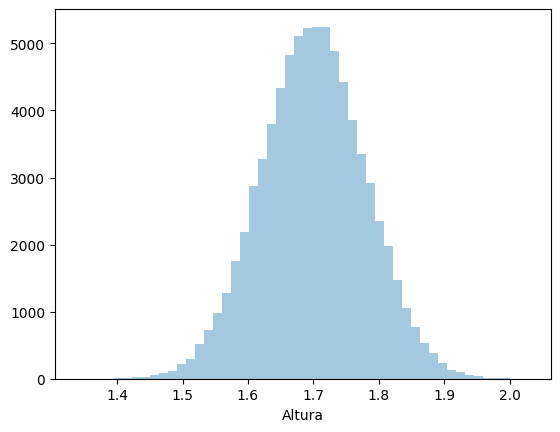

In [22]:
import seaborn as sns
ax = sns.distplot(base.Altura, kde = False)

/tmp/ipykernel_182542/876773135.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

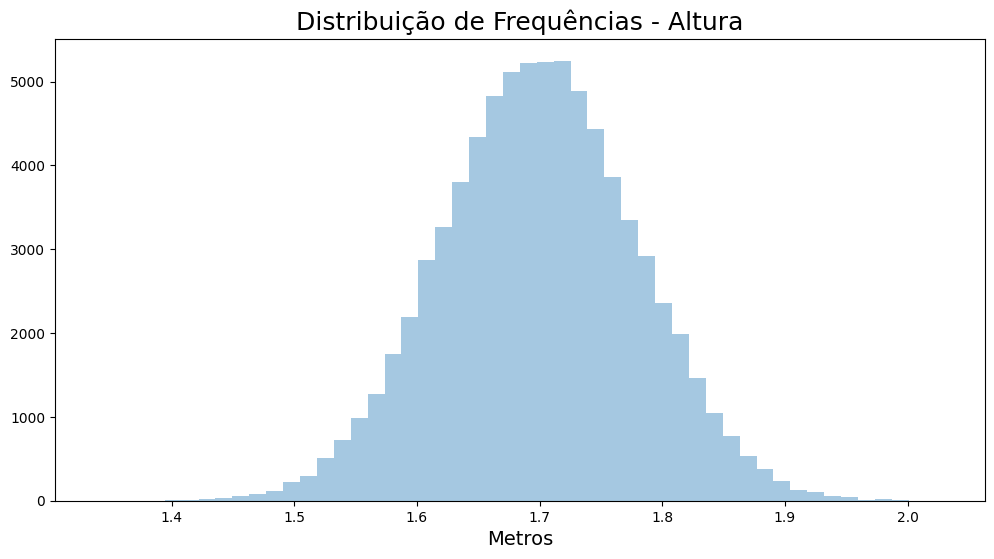

In [23]:
ax = sns.distplot(base.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax  

/tmp/ipykernel_182542/717628677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(base.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

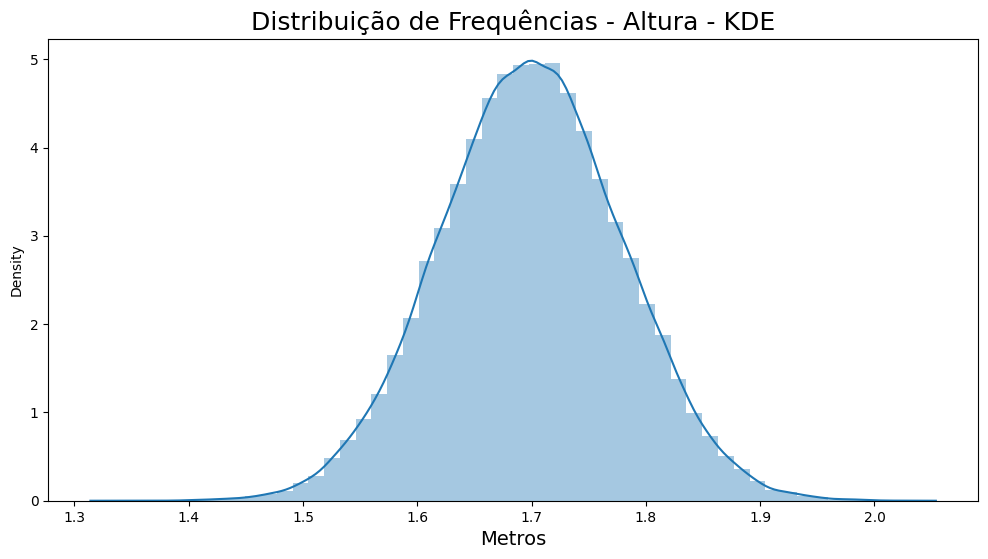

In [24]:
ax = sns.distplot(base.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax